In [76]:
import pandas as pd

train_df = pd.read_csv('train_df.csv')
# Valid and test dfs are swapped
valid_df = pd.read_csv('test_df.csv')
test_df = pd.read_csv('valid_df.csv')
pd.set_option('display.max_columns', None)
train_df

C:\Users\erudm\AppData\Local\Temp\ipykernel_26080\358566326.py:3: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('train_df.csv')


,Position,Name,dk_points,dk_salary,Team,Opp,Score,year,fd_points,fd_salary,yh_points,yh_salary,hits,abs,runs,rbis,doubles,triples,hrs,bbs,so,sb,e,hbp,sf,sac_bunts,cs,po,order,game_date,starter_throws,avg_hit_distance,avg_launch_speed,avg_launch_angle,estimated_ba_using_speedangle,estimated_woba_using_speedangle,total_delta_home_win_exp,total_delta_run_exp,home_team,position_2,position_3,position_4,position_5,position_6,position_7,day_num,day_of_week,angular_date,dk_salary_lagged_1,dk_salary_lagged_2,dk_salary_lagged_3,dk_salary_lagged_4,dk_salary_lagged_5,dk_salary_next
0,7,Matt Kemp,20.0,4200.0,SDG,away_sfo,10-2,2015,24.7,3900.0,NaN,NaN,4,5,1,1,2,0,0,0,1,0,0,0,0,0,0,0,3,2015-04-11,R,165.50000,87.525000,7.750000,0.680000,0.711000,0.015,2.124,True,False,False,False,False,False,True,6,5,4.48799,4600.0,4700.0,4700.0,4300.0,4000.0,4500.0
1,7,Wil Myers,16.0,3500.0,SDG,away_sfo,10-2,2015,22.4,3100.0,NaN,NaN,2,5,2,2,1,0,0,0,1,0,0,0,0,0,0,0,1,2015-04-11,R,175.00000,83.800000,16.600000,0.391750,0.427750,-0.053,0.917,True,False,False,False,False,False,True,6,5,4.48799,3800.0,3900.0,3900.0,3600.0,3300.0,3700.0
2,5,Adrian Beltre,15.0,5100.0,TEX,away_hou,6-2,2015,18.2,3900.0,NaN,NaN,2,5,1,0,1,1,0,0,0,0,0,0,0,0,0,0,3,2015-04-11,R,88.40000,88.300000,-4.600000,0.401200,0.377000,0.088,-0.269,True,False,False,False,True,False,False,6,5,4.48799,5200.0,4500.0,4500.0,4600.0,4400.0,4900.0
3,5,Will Middlebrooks,15.0,2900.0,SDG,away_sfo,10-2,2015,19.0,2400.0,NaN,NaN,3,5,0,2,1,0,0,0,1,0,0,0,0,0,0,0,6,2015-04-11,L,251.00000,90.866667,23.333333,0.561750,0.550500,0.123,1.801,True,False,False,False,True,False,False,6,5,4.48799,3200.0,3300.0,3200.0,3000.0,2800.0,3100.0
4,7,Justin Upton,14.0,3900.0,SDG,away_sfo,10-2,2015,19.4,3900.0,NaN,NaN,2,4,2,2,0,0,0,0,1,0,0,0,1,0,0,0,4,2015-04-11,L,109.75000,97.500000,3.000000,0.443250,0.462500,0.102,-0.450,True,False,False,False,False,False,True,6,5,4.48799,4300.0,4500.0,4500.0,4000.0,3800.0,4100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229469,4,Kolten Wong,0.0,3700.0,STL,away_was,1-8,2019,0.0,NaN,NaN,NaN,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2019-10-14,NaN,166.30777,84.576651,15.102708,0.323366,0.366371,NaN,NaN,False,False,False,True,False,False,False,193,0,0.00000,3400.0,3500.0,3700.0,3900.0,3700.0,3800.0
229470,4,Brian Dozier,0.0,3500.0,WAS,away_stl,8-1,2019,0.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,PH,2019-10-14,NaN,166.30777,84.576651,15.102708,0.323366,0.366371,NaN,NaN,True,False,False,True,False,False,False,193,0,0.00000,3600.0,3300.0,3500.0,3500.0,3600.0,3500.0
229471,5,Matt Carpenter,0.0,3400.0,STL,away_was,1-8,2019,0.0,NaN,NaN,NaN,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,PH,2019-10-14,NaN,166.30777,84.576651,15.102708,0.323366,0.366371,NaN,NaN,False,False,False,False,True,False,False,193,0,0.00000,3600.0,3900.0,3900.0,4000.0,3900.0,3900.0
229472,7,Dexter Fowler,0.0,3300.0,STL,away_was,1-8,2019,0.0,NaN,NaN,NaN,0,4,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,2019-10-14,NaN,166.30777,84.576651,15.102708,0.323366,0.366371,NaN,NaN,False,False,False,False,False,False,True,193,0,0.00000,3400.0,3500.0,3600.0,3800.0,3500.0,3500.0


In [77]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229474 entries, 0 to 229473
Data columns (total 54 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Position                         229474 non-null  int64  
 1   Name                             229474 non-null  object 
 2   dk_points                        229474 non-null  float64
 3   dk_salary                        229474 non-null  float64
 4   Team                             229474 non-null  object 
 5   Opp                              229474 non-null  object 
 6   Score                            229474 non-null  object 
 7   year                             229474 non-null  int64  
 8   fd_points                        229474 non-null  float64
 9   fd_salary                        140479 non-null  float64
 10  yh_points                        145197 non-null  float64
 11  yh_salary                        145197 non-null  float64
 12  hi

#### Because I dont want to delete ~12000 samples that have NA starter_throws values and it is a categorical column, I decided to fill the NA values with the mode which is 'R'.

In [78]:
throw_mode = train_df['starter_throws'].mode()[0]
throw_mode

'R'

In [79]:
train_df['starter_throws'] = train_df['starter_throws'].fillna(throw_mode)
valid_df['starter_throws'] = valid_df['starter_throws'].fillna(throw_mode)
test_df['starter_throws'] = test_df['starter_throws'].fillna(throw_mode)

#### Same thinking with total_delta_home_win_exp and total_delta_run_exp but since they are continous numerical values I'll replace them with their respective means instead.

In [80]:
tdhwe_mean = train_df['total_delta_home_win_exp'].mean()
tdre_mean = train_df['total_delta_run_exp'].mean()

train_df['total_delta_home_win_exp'] = train_df['total_delta_home_win_exp'].fillna(tdhwe_mean)
valid_df['total_delta_home_win_exp'] = valid_df['total_delta_home_win_exp'].fillna(tdhwe_mean)
test_df['total_delta_home_win_exp'] = test_df['total_delta_home_win_exp'].fillna(tdhwe_mean)

train_df['total_delta_run_exp'] = train_df['total_delta_run_exp'].fillna(tdre_mean)
valid_df['total_delta_run_exp'] = valid_df['total_delta_run_exp'].fillna(tdre_mean)
test_df['total_delta_run_exp'] = test_df['total_delta_run_exp'].fillna(tdre_mean)

In [81]:
train_df['dk_points_next'] = train_df.groupby(['Name', 'year'])['dk_points'].shift(-1)
train_df.dropna(subset=['dk_points_next'], inplace=True)

valid_df['dk_points_next'] = valid_df.groupby(['Name', 'year'])['dk_points'].shift(-1)
valid_df.dropna(subset=['dk_points_next'], inplace=True)

test_df['dk_points_next'] = test_df.groupby(['Name', 'year'])['dk_points'].shift(-1)
test_df.dropna(subset=['dk_points_next'], inplace=True)

## Preprocess the data

In [82]:
train_df = train_df.sort_values(by=['Name', 'game_date']).reset_index(drop=True)
valid_df = valid_df.sort_values(by=['Name', 'game_date']).reset_index(drop=True)
test_df = test_df.sort_values(by=['Name', 'game_date']).reset_index(drop=True)

train_df['original_index'] = train_df.index
valid_df['original_index'] = valid_df.index
test_df['original_index'] = test_df.index

In [83]:
train_df

,Position,Name,dk_points,dk_salary,Team,Opp,Score,year,fd_points,fd_salary,yh_points,yh_salary,hits,abs,runs,rbis,doubles,triples,hrs,bbs,so,sb,e,hbp,sf,sac_bunts,cs,po,order,game_date,starter_throws,avg_hit_distance,avg_launch_speed,avg_launch_angle,estimated_ba_using_speedangle,estimated_woba_using_speedangle,total_delta_home_win_exp,total_delta_run_exp,home_team,position_2,position_3,position_4,position_5,position_6,position_7,day_num,day_of_week,angular_date,dk_salary_lagged_1,dk_salary_lagged_2,dk_salary_lagged_3,dk_salary_lagged_4,dk_salary_lagged_5,dk_salary_next,dk_points_next,original_index
0,2,AJ Ellis,2.0,2900.0,LAD,away_sfo,1-2,2015,3.0,2200.0,NaN,NaN,0,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,8,2015-04-28,L,6.000000,67.900000,-15.000000,0.040000,0.036000,-6.000000e-02,-0.40100,True,True,False,False,False,False,False,23,1,0.897598,2700.0,3100.0,2800.0,3500.0,2900.0,3000.0,0.0,0
1,2,AJ Ellis,0.0,3000.0,LAD,away_ari,1-0(F13),2015,0.0,2200.0,NaN,NaN,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,2015-05-03,R,206.333333,79.725000,6.750000,0.069000,0.073667,-1.090000e-01,-0.74100,True,True,False,False,False,False,False,28,6,5.385587,2900.0,2700.0,3100.0,2800.0,3500.0,2700.0,3.0,1
2,2,AJ Ellis,3.0,2700.0,LAD,away_mil,3-6,2015,3.0,2200.0,NaN,NaN,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,2015-05-06,R,283.500000,85.475000,3.500000,0.078000,0.071333,-1.000000e-03,0.05200,False,True,False,False,False,False,False,31,2,1.795196,3000.0,2900.0,2700.0,3100.0,2800.0,3200.0,4.0,2
3,2,AJ Ellis,4.0,3200.0,LAD,away_col,9-5,2015,6.5,2700.0,NaN,NaN,0,3,0,1,0,0,0,1,0,0,0,0,0,1,0,0,8,2015-05-10,L,235.000000,91.440000,16.600000,0.277667,0.286667,6.071532e-18,0.21600,False,True,False,False,False,False,False,35,6,5.385587,2700.0,3000.0,2900.0,2700.0,3100.0,2600.0,0.0,3
4,2,AJ Ellis,0.0,2600.0,LAD,away_col,1-7,2015,0.0,2700.0,NaN,NaN,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,8,2015-05-16,L,14.500000,70.050000,-7.500000,0.056500,0.053500,-7.000000e-02,-0.75300,True,True,False,False,False,False,False,41,5,4.487990,3200.0,2700.0,3000.0,2900.0,2700.0,2600.0,5.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226518,7,Zack Granite,20.0,2500.0,MIN,away_det,10-4,2017,28.9,2000.0,17.4,7.0,1,1,2,3,0,0,1,0,0,0,0,0,0,0,0,0,PH,2017-09-23,L,189.500000,92.300000,13.000000,0.100000,0.139000,-2.800000e-02,2.59700,False,False,False,False,False,False,True,171,5,4.487990,2300.0,2300.0,2300.0,2100.0,2000.0,2400.0,7.0,226518
226519,7,Zack Granite,7.0,2400.0,MIN,away_det,10-4,2017,9.7,2000.0,5.7,10.0,1,3,1,1,0,0,0,0,0,0,0,0,1,0,0,0,9,2017-09-24,R,115.000000,76.800000,15.400000,0.274750,0.268250,1.000000e-02,-0.91400,False,False,False,False,False,False,True,172,6,5.385587,2500.0,2300.0,2300.0,2300.0,2100.0,2400.0,2.0,226519
226520,7,Zack Granite,2.0,2400.0,MIN,away_cle,8-6,2017,3.2,2400.0,1.8,7.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,PH,2017-09-26,R,166.307770,84.576651,15.102708,0.323366,0.366371,1.523901e-03,0.01746,False,False,False,False,False,False,True,174,1,0.897598,2400.0,2500.0,2300.0,2300.0,2300.0,2400.0,3.0,226520
226521,7,Zack Granite,3.0,2400.0,MIN,away_cle,2-5,2017,3.0,2300.0,2.1,8.0,1,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2017-09-28,R,64.000000,84.750000,-1.250000,0.162333,0.146000,1.800000e-02,-0.37400,False,False,False,False,False,False,True,176,3,2.692794,2400.0,2400.0,2500.0,2300.0,2300.0,2400.0,7.0,226521


In [84]:
cols_to_drop = ['Position', 'Score', 'day_num', 'day_of_week', 'year', 'fd_points', 'fd_salary', 'yh_points', 'yh_salary', 'dk_salary_lagged_5', 'dk_salary_lagged_4', 'dk_salary_lagged_3', 'dk_salary_lagged_2', 'dk_salary_lagged_1', 'dk_salary_next']
train_df.drop(cols_to_drop, axis=1, inplace=True)
valid_df.drop(cols_to_drop, axis=1, inplace=True)
test_df.drop(cols_to_drop, axis=1, inplace=True)

In [85]:
train_df

,Name,dk_points,dk_salary,Team,Opp,hits,abs,runs,rbis,doubles,triples,hrs,bbs,so,sb,e,hbp,sf,sac_bunts,cs,po,order,game_date,starter_throws,avg_hit_distance,avg_launch_speed,avg_launch_angle,estimated_ba_using_speedangle,estimated_woba_using_speedangle,total_delta_home_win_exp,total_delta_run_exp,home_team,position_2,position_3,position_4,position_5,position_6,position_7,angular_date,dk_points_next,original_index
0,AJ Ellis,2.0,2900.0,LAD,away_sfo,0,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,8,2015-04-28,L,6.000000,67.900000,-15.000000,0.040000,0.036000,-6.000000e-02,-0.40100,True,True,False,False,False,False,False,0.897598,0.0,0
1,AJ Ellis,0.0,3000.0,LAD,away_ari,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,2015-05-03,R,206.333333,79.725000,6.750000,0.069000,0.073667,-1.090000e-01,-0.74100,True,True,False,False,False,False,False,5.385587,3.0,1
2,AJ Ellis,3.0,2700.0,LAD,away_mil,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,2015-05-06,R,283.500000,85.475000,3.500000,0.078000,0.071333,-1.000000e-03,0.05200,False,True,False,False,False,False,False,1.795196,4.0,2
3,AJ Ellis,4.0,3200.0,LAD,away_col,0,3,0,1,0,0,0,1,0,0,0,0,0,1,0,0,8,2015-05-10,L,235.000000,91.440000,16.600000,0.277667,0.286667,6.071532e-18,0.21600,False,True,False,False,False,False,False,5.385587,0.0,3
4,AJ Ellis,0.0,2600.0,LAD,away_col,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,8,2015-05-16,L,14.500000,70.050000,-7.500000,0.056500,0.053500,-7.000000e-02,-0.75300,True,True,False,False,False,False,False,4.487990,5.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226518,Zack Granite,20.0,2500.0,MIN,away_det,1,1,2,3,0,0,1,0,0,0,0,0,0,0,0,0,PH,2017-09-23,L,189.500000,92.300000,13.000000,0.100000,0.139000,-2.800000e-02,2.59700,False,False,False,False,False,False,True,4.487990,7.0,226518
226519,Zack Granite,7.0,2400.0,MIN,away_det,1,3,1,1,0,0,0,0,0,0,0,0,1,0,0,0,9,2017-09-24,R,115.000000,76.800000,15.400000,0.274750,0.268250,1.000000e-02,-0.91400,False,False,False,False,False,False,True,5.385587,2.0,226519
226520,Zack Granite,2.0,2400.0,MIN,away_cle,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,PH,2017-09-26,R,166.307770,84.576651,15.102708,0.323366,0.366371,1.523901e-03,0.01746,False,False,False,False,False,False,True,0.897598,3.0,226520
226521,Zack Granite,3.0,2400.0,MIN,away_cle,1,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2017-09-28,R,64.000000,84.750000,-1.250000,0.162333,0.146000,1.800000e-02,-0.37400,False,False,False,False,False,False,True,2.692794,7.0,226521


In [56]:
def transform_date(df):
    df['sin_date'] = np.sin(df['angular_date'])
    df['cos_date'] = np.cos(df['angular_date'])

In [57]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import torch
from sklearn.compose import ColumnTransformer

numerical_features = ['dk_points', 'dk_salary', 'hits', 'abs', 'runs', 'rbis', 'doubles', 'triples', 'hrs', 'bbs', 'so', 'sb', 'e', 'hbp', 'sf', 'sac_bunts', 'cs', 'po', 'avg_hit_distance', 'avg_launch_speed', 'avg_launch_angle', 'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle', 'total_delta_home_win_exp', 'total_delta_run_exp']
categorical_features = ['Team', 'Opp', 'starter_throws', 'order']
boolean_features = ['home_team', 'position_2', 'position_3', 'position_4', 'position_5', 'position_6', 'position_7']

transform_date(train_df)
transform_date(valid_df)
transform_date(test_df)

cols_to_keep = ['original_index', 'game_date', 'Name', 'dk_points_next', 'sin_date', 'cos_date']
train_normal_cols = train_df[cols_to_keep]
valid_normal_cols = valid_df[cols_to_keep]
test_normal_cols = test_df[cols_to_keep]

transformer = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features),
        ('bool', OneHotEncoder(drop='if_binary'), boolean_features)
    ]
)

transformer.fit(train_df)
cols = transformer.get_feature_names_out()

train_transformed = pd.DataFrame(transformer.transform(train_df).toarray(), columns=transformer.get_feature_names_out(), index=train_normal_cols.index)
valid_transformed = pd.DataFrame(transformer.transform(valid_df).toarray(), columns=transformer.get_feature_names_out(), index=valid_normal_cols.index)
test_transformed = pd.DataFrame(transformer.transform(test_df).toarray(), columns=transformer.get_feature_names_out(), index=test_normal_cols.index)

scaled_train_df = pd.concat([train_normal_cols, train_transformed], axis=1)
scaled_valid_df = pd.concat([valid_normal_cols, valid_transformed], axis=1)
scaled_test_df = pd.concat([test_normal_cols, test_transformed], axis=1)

In [13]:
scaled_train_df

,original_index,Name,dk_points_next,sin_date,cos_date,num__dk_points,num__dk_salary,num__hits,num__abs,num__runs,num__rbis,num__doubles,num__triples,num__hrs,num__bbs,num__so,num__sb,num__e,num__hbp,num__sf,num__sac_bunts,num__cs,num__po,num__avg_hit_distance,num__avg_launch_speed,num__avg_launch_angle,num__estimated_ba_using_speedangle,num__estimated_woba_using_speedangle,num__total_delta_home_win_exp,num__total_delta_run_exp,cat__Team_ARI,cat__Team_ATL,cat__Team_BAL,cat__Team_BOS,cat__Team_CHC,cat__Team_CHW,cat__Team_CIN,cat__Team_CLE,cat__Team_COL,cat__Team_DET,cat__Team_HOU,cat__Team_KAN,cat__Team_LAA,cat__Team_LAD,cat__Team_MIA,cat__Team_MIL,cat__Team_MIN,cat__Team_NYM,cat__Team_NYY,cat__Team_OAK,cat__Team_PHI,cat__Team_PIT,cat__Team_SDG,cat__Team_SEA,cat__Team_SFO,cat__Team_STL,cat__Team_TAM,cat__Team_TEX,cat__Team_TOR,cat__Team_WAS,cat__Opp_away_ari,cat__Opp_away_atl,cat__Opp_away_bal,cat__Opp_away_bos,cat__Opp_away_chc,cat__Opp_away_chw,cat__Opp_away_cin,cat__Opp_away_cle,cat__Opp_away_col,cat__Opp_away_det,cat__Opp_away_hou,cat__Opp_away_kan,cat__Opp_away_laa,cat__Opp_away_lad,cat__Opp_away_mia,cat__Opp_away_mil,cat__Opp_away_min,cat__Opp_away_nym,cat__Opp_away_nyy,cat__Opp_away_oak,cat__Opp_away_phi,cat__Opp_away_pit,cat__Opp_away_sdg,cat__Opp_away_sea,cat__Opp_away_sfo,cat__Opp_away_stl,cat__Opp_away_tam,cat__Opp_away_tex,cat__Opp_away_tor,cat__Opp_away_was,cat__starter_throws_L,cat__starter_throws_R,cat__order_0,cat__order_1,cat__order_2,cat__order_3,cat__order_4,cat__order_5,cat__order_6,cat__order_7,cat__order_8,cat__order_9,cat__order_PH,bool__home_team_True,bool__position_2_True,bool__position_3_True,bool__position_4_True,bool__position_5_True,bool__position_6_True,bool__position_7_True
0,0,AJ Ellis,0.0,0.781831,0.623490,-0.618131,-0.926141,-0.938720,-0.915616,-0.659395,-0.514481,-0.409942,-0.129898,-0.340934,1.232617,0.288309,-0.209079,-0.216881,-0.186694,-0.155425,-0.170943,-0.13877,-0.049203,-2.148092,-1.977242,-1.839678,-1.497653,-1.305907,-0.586134,-0.460450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,AJ Ellis,3.0,-0.781831,0.623490,-0.898750,-0.800486,-0.938720,-0.180207,-0.659395,-0.514481,-0.409942,-0.129898,-0.340934,-0.542630,-0.907928,-0.209079,-0.216881,-0.186694,-0.155425,-0.170943,-0.13877,-0.049203,0.532136,-0.577527,-0.510355,-1.344633,-1.157339,-1.052873,-0.833473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,AJ Ellis,4.0,0.974928,-0.222521,-0.477821,-1.177450,0.182382,-0.180207,-0.659395,-0.514481,-0.409942,-0.129898,-0.340934,-0.542630,-0.907928,-0.209079,-0.216881,-0.186694,-0.155425,-0.170943,-0.13877,-0.049203,1.564537,0.103095,-0.708989,-1.297144,-1.166542,-0.024143,0.036548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,AJ Ellis,0.0,-0.781831,0.623490,-0.337511,-0.549176,-0.938720,-0.180207,-0.659395,0.705596,-0.409942,-0.129898,-0.340934,1.232617,-0.907928,-0.209079,-0.216881,-0.186694,-0.155425,5.803821,-0.13877,-0.049203,0.915663,0.809167,0.091661,-0.243597,-0.317206,-0.014618,0.216477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [14]:
def create_sequences(data, sequence_length=5):
    x_cols = [col for col in data.columns if col not in ['Name', 'dk_points_next', 'original_index']]
    xs = []
    ys = []
    indices = []
    for i in range(len(data) - sequence_length):
        x = data.iloc[i:(i + sequence_length)][x_cols].values
        y = data.iloc[i + sequence_length - 1]['dk_points_next']
        index = data.iloc[i + sequence_length]['original_index']
        xs.append(x)
        ys.append(y)
        indices.append(index)

    return np.array(xs), np.array(ys), np.array(indices)

def create_player_sequences(df, sequence_length=5):
    xs = []
    ys = []
    indices = []
    players = df['Name'].unique()

    for player in players:
        player_data = df[df['Name'] == player]
        sequences, labels, inds = create_sequences(player_data, sequence_length)
        xs.extend(sequences)
        ys.extend(labels)
        indices.extend(inds)
    
    return np.array(xs), np.array(ys), np.array(indices)

In [15]:
train_x, train_y, train_indices = create_player_sequences(scaled_train_df)
valid_x, valid_y, valid_indices = create_player_sequences(scaled_valid_df)
test_x, test_y, test_indices = create_player_sequences(scaled_test_df)

In [16]:
train_x, train_y, train_indices = map(torch.tensor, (train_x, train_y, train_indices))
valid_x, valid_y, valid_indices = map(torch.tensor, (valid_x, valid_y, valid_indices))
test_x, test_y, test_indices = map(torch.tensor, (test_x, test_y, test_indices))

train_x = train_x.float()
train_y = train_y.float()

valid_x = valid_x.float()
valid_y = valid_y.float()

test_x = test_x.float()
test_y = test_y.float()

In [17]:
from torch.utils.data import Dataset

class HitterDataset(Dataset):
    def __init__(self, x, y, indices):
        self.x = x
        self.y = y
        self.indices = indices
    
    def __getitem__(self, index):
        return self.x[index], self.y[index], self.indices[index]
    
    def __len__(self):
        return len(self.x)

In [18]:
from torch.utils.data import DataLoader

batch_size = 32

train_data = HitterDataset(train_x, train_y, train_indices)
valid_data = HitterDataset(valid_x, valid_y, valid_indices)
test_data = HitterDataset(test_x, test_y, test_indices)

train_loader = DataLoader(train_data, batch_size=batch_size)
valid_loader = DataLoader(valid_data, batch_size=batch_size)
test_loader = DataLoader(test_data, batch_size=batch_size)

In [29]:
import torch.nn as nn

class LSTMModel(nn.Module):
    def __init__(self, hidden_layer_size, num_layers, dropout=0, input_size=train_x.shape[2]):
        super(LSTMModel, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_layer_size)
        self.relu = nn.ReLU()
        self.lstm = nn.LSTM(hidden_layer_size, hidden_size=hidden_layer_size, num_layers=num_layers)
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(hidden_layer_size, 1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        lstm_out, (hn, cn) = self.lstm(out)
        out = lstm_out[:, -1, :]
        out = self.dropout(out)
        out = self.fc2(out)
        return out.squeeze()

In [30]:
import seaborn as sns

def plot_loss_curves(epochs, train_loss, valid_loss):
    sns.lineplot(x=epochs, y=train_loss, label='Train')
    sns.lineplot(x=epochs, y=valid_loss, label='Valid')

In [31]:
from torch import optim

def train_model(epochs, model, optimizer, criterion):
    train_loss = []
    valid_loss = []
    
    for epoch in range(epochs):
        model.train()
        epoch_train_loss = 0.
        for data, labels, _ in train_loader:
            optimizer.zero_grad()
            output = model.forward(data)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item()
        train_loss.append(epoch_train_loss / len(train_loader))
        
        model.eval()
        epoch_valid_loss = 0.
        for data, labels, _ in valid_loader:
            output = model.forward(data)
            loss = criterion(output, labels)
            epoch_valid_loss += loss.item()
        valid_loss.append(epoch_valid_loss / len(valid_loader))
        
        print('Epoch', epoch, 'losses', train_loss[-1], valid_loss[-1])

    plot_loss_curves(np.linspace(1, epochs, epochs).astype(int), train_loss, valid_loss)
    return train_loss, valid_loss

Epoch 0 losses 53.77912126539209 55.264047777169964
Epoch 1 losses 50.68750175425664 53.481235694291065
Epoch 2 losses 48.98042806030904 53.23659618472756
Epoch 3 losses 48.80786014457165 53.136722713244666
Epoch 4 losses 48.68564508692644 53.08955639099406
Epoch 5 losses 48.566670542573185 53.07327945804299
Epoch 6 losses 48.56251146881515 53.08565320404148
Epoch 7 losses 48.50536248533799 53.10321179208726
Epoch 8 losses 48.460908308117325 53.09388702309391
Epoch 9 losses 48.409705673319145 53.11548001298281


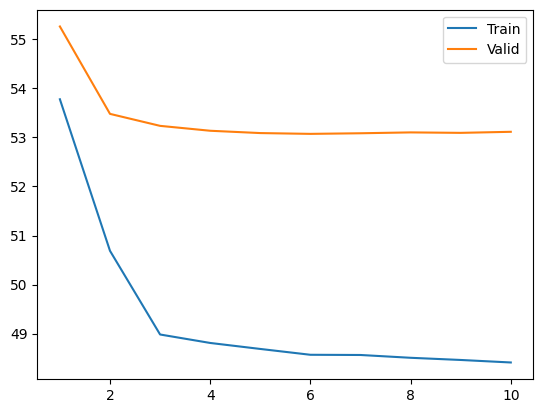

In [22]:
# Increasing lr
model = LSTMModel(hidden_layer_size=32, num_layers=2, dropout=0.2)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()
epochs = 10

train_loss, valid_loss = train_model(epochs, model, optimizer, criterion)

Epoch 0 losses 54.1039912142828 55.316641685747285
Epoch 1 losses 50.45637479839402 53.34899795983811
Epoch 2 losses 49.2913191362587 53.18562469304165
Epoch 3 losses 49.16681554006194 53.13132893333554
Epoch 4 losses 49.04508165036372 53.11806423270443
Epoch 5 losses 48.97987736931156 53.11625334778307
Epoch 6 losses 48.98491310460384 53.12880577847965
Epoch 7 losses 48.93072927707472 53.13830583340654
Epoch 8 losses 48.9199794799451 53.11822056398956
Epoch 9 losses 48.83340013109832 53.13125982314256


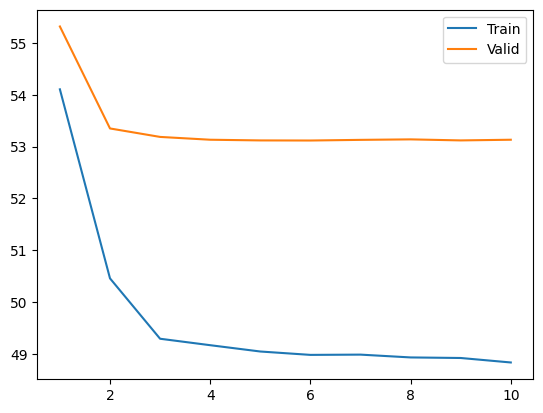

In [23]:
# Model seems to maybe be overfitting - increase dropout
model = LSTMModel(hidden_layer_size=32, num_layers=2, dropout=0.4)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()
epochs = 10

train_loss, valid_loss = train_model(epochs, model, optimizer, criterion)

Epoch 0 losses 53.641319560288416 53.520376719418344
Epoch 1 losses 49.58415704363003 53.2458323749055
Epoch 2 losses 49.330844542389315 53.15853069578747
Epoch 3 losses 49.264135464294185 53.10425205765483
Epoch 4 losses 49.13550208800793 53.07996195201933
Epoch 5 losses 49.05726210779017 53.07420696424918
Epoch 6 losses 48.967472597328246 53.07197213989923
Epoch 7 losses 48.99378075157542 53.049445826687915
Epoch 8 losses 48.904505302698055 53.045981160576844
Epoch 9 losses 48.8313577098009 53.064735849327015


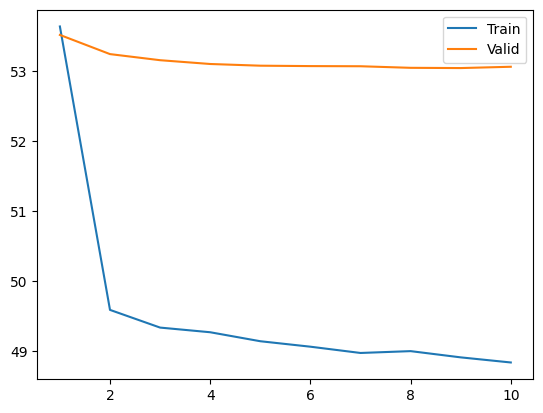

In [24]:
# Try different number of layers?
model = LSTMModel(hidden_layer_size=32, num_layers=1, dropout=0.4)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()
epochs = 10

train_loss, valid_loss = train_model(epochs, model, optimizer, criterion)

Epoch 0 losses 51.62164931625111 53.38412768224318
Epoch 1 losses 48.9172750090258 53.178919408923
Epoch 2 losses 48.77036443010085 53.11205693123125
Epoch 3 losses 48.64983461875574 53.113149645915286
Epoch 4 losses 48.5899261442104 53.10536916085121
Epoch 5 losses 48.52047705664103 53.126444047113814
Epoch 6 losses 48.50781454102005 53.13591819240297
Epoch 7 losses 48.47076806389893 53.14968066646303
Epoch 8 losses 48.43287407828507 53.15424842775054
Epoch 9 losses 48.39739474080877 53.145395433419964


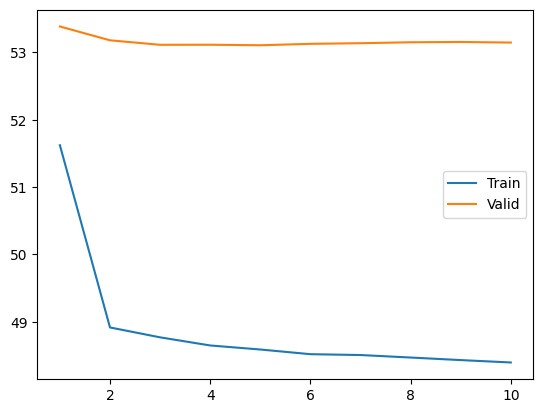

In [25]:
# Increase hidden_layer_size to 64
model = LSTMModel(hidden_layer_size=64, num_layers=2, dropout=0.4)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()
epochs = 10

train_loss, valid_loss = train_model(epochs, model, optimizer, criterion)

The losses aren't really changing for this model, so we can try to add another activation layer after the lstm.

In [26]:
class LSTMModel_2(nn.Module):
    def __init__(self, hidden_layer_size, num_layers, dropout=0.2, input_size=train_x.shape[2]):
        super(LSTMModel_2, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_layer_size)
        self.relu = nn.ReLU()
        self.lstm = nn.LSTM(hidden_layer_size, hidden_size=hidden_layer_size, num_layers=num_layers)
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(hidden_layer_size, 1) 

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        lstm_out, (hn, cn) = self.lstm(out)
        out = lstm_out[:, -1, :]
        out = self.dropout(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out.squeeze()

Epoch 0 losses 56.50578147382973 55.4371765410046
Epoch 1 losses 52.38586822374235 55.3619327604585
Epoch 2 losses 50.63563421721544 53.45787690064618
Epoch 3 losses 49.82807143308881 53.28300117480792
Epoch 4 losses 49.642254450774345 53.23160251427291
Epoch 5 losses 49.510100316891155 53.20447616636567
Epoch 6 losses 49.44687460241533 53.18790384393615
Epoch 7 losses 49.26867442603472 53.177839522792546
Epoch 8 losses 49.1482110584767 53.17636204657153
Epoch 9 losses 49.08362033840964 53.16028430974372


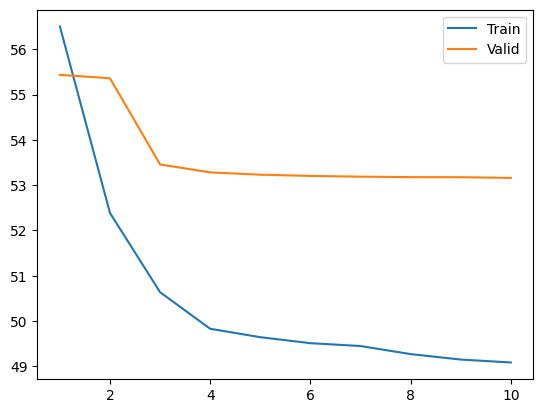

In [27]:
model = LSTMModel_2(hidden_layer_size=32, num_layers=2, dropout=0.4)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()
epochs = 10

train_loss, valid_loss = train_model(epochs, model, optimizer, criterion)

Epoch 0 losses 54.35536912278176 55.304703388630045
Epoch 1 losses 51.521739610766204 53.87745210760479
Epoch 2 losses 49.44661154084506 53.34473351748933
Epoch 3 losses 49.20075374562777 53.261314840702994
Epoch 4 losses 49.07411366566835 53.19145236208431
Epoch 5 losses 48.91334366619346 53.1588671348548
Epoch 6 losses 48.87803427722673 53.167792338077156
Epoch 7 losses 48.80752345435816 53.12849234643384
Epoch 8 losses 48.736408430258706 53.11989906940876
Epoch 9 losses 48.682133130019004 53.14259767977991


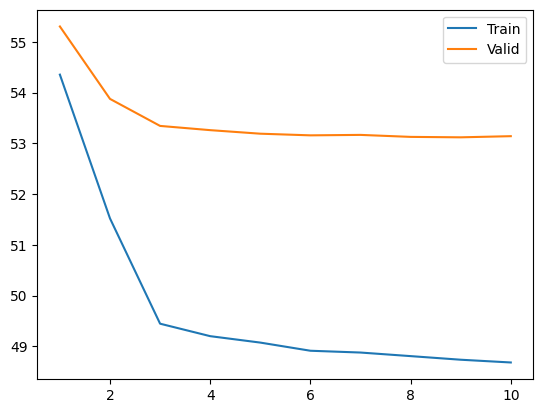

In [28]:
# Increase hidden_layer_size
model = LSTMModel_2(hidden_layer_size=64, num_layers=2, dropout=0.4)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()
epochs = 10
train_loss, valid_loss = train_model(epochs, model, optimizer, criterion)

Epoch 0 losses 53.180770827675744 55.25020125796119
Epoch 1 losses 50.80283984932715 53.37773460316881
Epoch 2 losses 48.997809724887624 53.3140585444798
Epoch 3 losses 48.75431060660168 53.274689814012
Epoch 4 losses 48.67551436973817 53.19624746328574
Epoch 5 losses 48.55521117532136 53.19504438976632
Epoch 6 losses 48.50259782054533 53.21919052326048
Epoch 7 losses 48.408105140748845 53.24821167051606
Epoch 8 losses 48.38069794041652 53.22101857431952
Epoch 9 losses 48.28525037451468 53.3136873661172
Epoch 10 losses 48.22167656918883 53.30949297872288
Epoch 11 losses 48.15725172929582 53.32839518989729
Epoch 12 losses 48.09095007652908 53.37433985237763
Epoch 13 losses 48.02157634445038 53.390111245841624
Epoch 14 losses 47.95760937951879 53.54246780954046


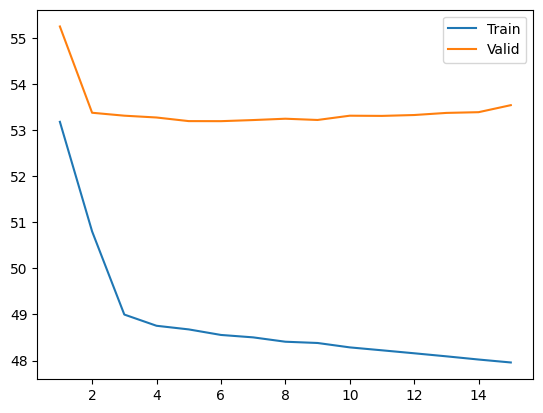

In [29]:
# Increase hidden_layer_size even more?
model = LSTMModel_2(hidden_layer_size=128, num_layers=2, dropout=0.4)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()
epochs = 15
train_loss, valid_loss = train_model(epochs, model, optimizer, criterion)

The model still seems to potentially be overfitting so I thought the model might be too complicated. Because of this I got rid of the first linear layer and have the lstm be the first layer.

In [30]:
class LSTMModel_3(nn.Module):
    def __init__(self, hidden_layer_size, num_layers, dropout=0.2, input_size=train_x.shape[2]):
        super(LSTMModel_3, self).__init__()
        self.relu = nn.ReLU()
        self.lstm = nn.LSTM(input_size, hidden_size=hidden_layer_size, num_layers=num_layers)
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(hidden_layer_size, 1) 

    def forward(self, x):
        lstm_out, (hn, cn) = self.lstm(x)
        out = lstm_out[:, -1, :]
        out = self.dropout(out)
        out = self.relu(out)
        out = self.fc2(out)
        return out.squeeze()

Epoch 0 losses 60.50959077761533 55.98760314893871
Epoch 1 losses 53.09227826263366 55.46630616351452
Epoch 2 losses 52.094592521398624 53.87895278990083
Epoch 3 losses 50.627477578384074 53.450633393641205
Epoch 4 losses 50.287674822675086 53.3515818319588
Epoch 5 losses 50.09787968842712 53.25859704418717
Epoch 6 losses 49.89452684166664 53.24886636050691
Epoch 7 losses 49.72464904559271 53.21969686193258
Epoch 8 losses 49.6112561940045 53.1740169495437
Epoch 9 losses 49.395461429894006 53.17530210441518


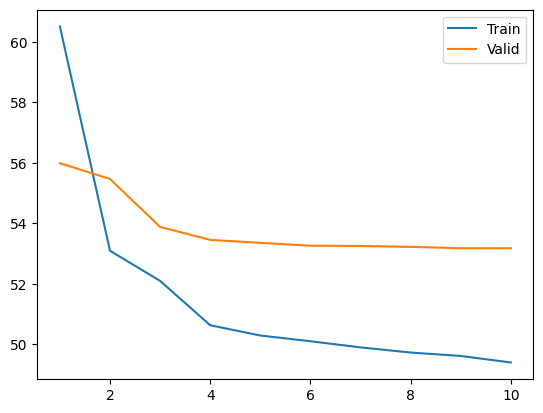

In [31]:
model = LSTMModel_3(hidden_layer_size=32, num_layers=2, dropout=0.4)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()
epochs = 10
train_loss, valid_loss = train_model(epochs, model, optimizer, criterion)

Epoch 0 losses 51.05320134244166 53.31965544810548
Epoch 1 losses 48.99938384588573 53.117617075317
Epoch 2 losses 48.679620329112005 53.19915839519085
Epoch 3 losses 48.49067007173079 53.20219709865772
Epoch 4 losses 48.34397274775701 53.265891728742844
Epoch 5 losses 48.2181832960477 53.357314184075946
Epoch 6 losses 48.117304022707465 53.43401388067323
Epoch 7 losses 48.04151188638567 53.56236195787091
Epoch 8 losses 47.950454687397304 53.6331534281698
Epoch 9 losses 47.86029462481013 53.69564393599085


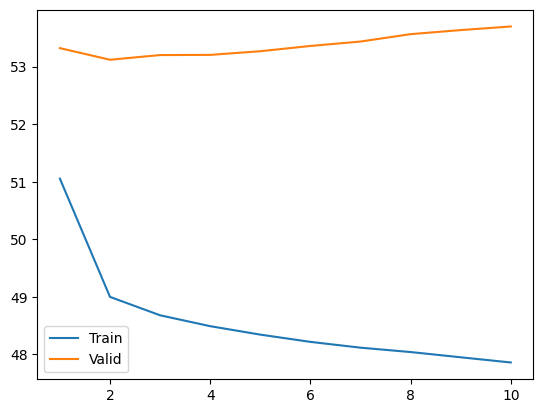

In [32]:
# Recude num_layers and increase lr
model = LSTMModel_3(hidden_layer_size=32, num_layers=1, dropout=0.4)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
epochs = 10
train_loss, valid_loss = train_model(epochs, model, optimizer, criterion)

Epoch 0 losses 57.246952377393164 55.34555409927606
Epoch 1 losses 50.76716456270025 53.55351398147155
Epoch 2 losses 50.01544666820561 53.34389744517959
Epoch 3 losses 49.75854613380168 53.251157282297484
Epoch 4 losses 49.50555549268431 53.19804669911988
Epoch 5 losses 49.39119460939466 53.17688352222383
Epoch 6 losses 49.238387723591615 53.15563270533196
Epoch 7 losses 49.127134356520756 53.14761908997628
Epoch 8 losses 49.0727298498016 53.11831361705269
Epoch 9 losses 48.95614946811341 53.13946969041201


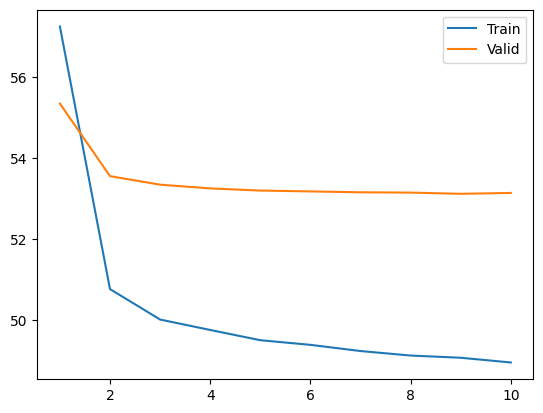

In [33]:
# Go back to lower lr
model = LSTMModel_3(hidden_layer_size=32, num_layers=1, dropout=0.4)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()
epochs = 10
train_loss, valid_loss = train_model(epochs, model, optimizer, criterion)

Epoch 0 losses 56.07224571753071 55.18843975839585
Epoch 1 losses 50.244392893549886 53.43541866373793
Epoch 2 losses 49.49965824714498 53.303153427219094
Epoch 3 losses 49.32233238075594 53.24485367332292
Epoch 4 losses 49.14277807196601 53.23861274243887
Epoch 5 losses 48.96776236267465 53.247066889967876
Epoch 6 losses 48.88029938602227 53.21772869799367
Epoch 7 losses 48.803935118178835 53.17781637316552
Epoch 8 losses 48.746783403906775 53.217739081457026
Epoch 9 losses 48.66586001121812 53.16632706948158


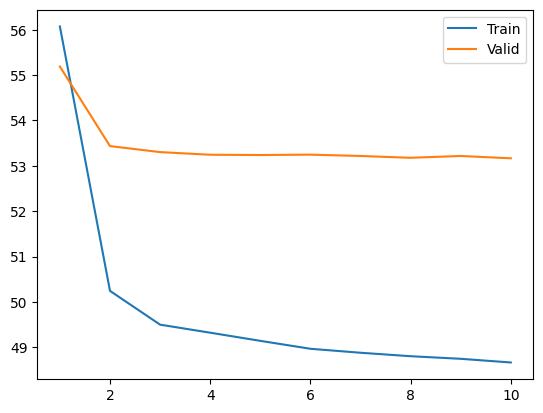

In [34]:
model = LSTMModel_3(hidden_layer_size=64, num_layers=1, dropout=0.4)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()
epochs = 10
train_loss, valid_loss = train_model(epochs, model, optimizer, criterion)

Epoch 0 losses 56.7454952044958 55.56818124289825
Epoch 1 losses 52.8880566144389 54.605299352485446
Epoch 2 losses 50.75813083363571 53.44858450310252
Epoch 3 losses 50.187745655085706 53.24995086943249
Epoch 4 losses 50.069841279383 53.18875880553344
Epoch 5 losses 49.825823833114626 53.1372639308466
Epoch 6 losses 49.57794295501874 53.10096866987947
Epoch 7 losses 49.448284160464155 53.120754960912784
Epoch 8 losses 49.312189119183074 53.111590938033345
Epoch 9 losses 49.2062876535798 53.12778167189839


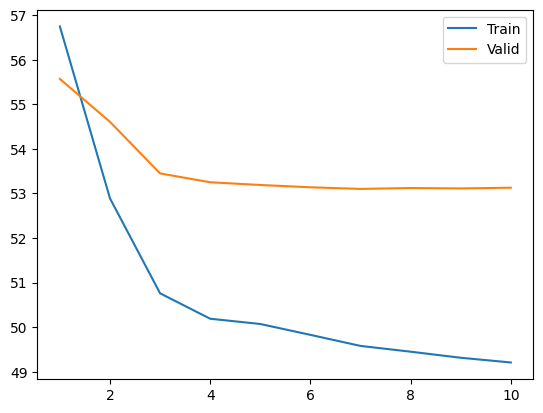

In [35]:
model = LSTMModel_3(hidden_layer_size=32, num_layers=2, dropout=0.5)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()
epochs = 10
train_loss, valid_loss = train_model(epochs, model, optimizer, criterion)

Epoch 0 losses 55.293704143567695 55.28773210353198
Epoch 1 losses 51.69153889901786 54.001248591414125
Epoch 2 losses 49.70956707455257 53.39152324533908
Epoch 3 losses 49.491331513667646 53.34045160299521
Epoch 4 losses 49.29870484227875 53.223617310093196
Epoch 5 losses 49.224193971739695 53.13946673431872
Epoch 6 losses 49.117850911954726 53.15071610126911
Epoch 7 losses 49.005195798452434 53.1613066545528
Epoch 8 losses 48.93307185269449 53.18960483051906
Epoch 9 losses 48.83021768430008 53.15780440297825


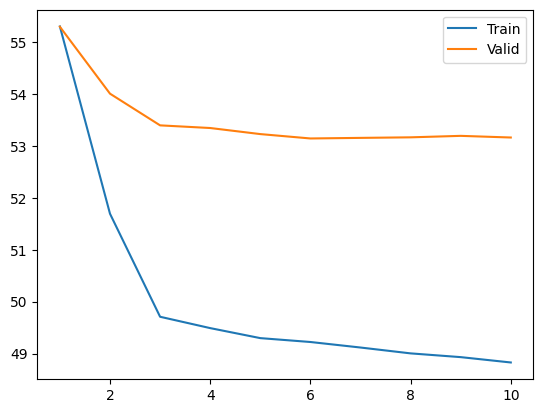

In [36]:
model = LSTMModel_3(hidden_layer_size=64, num_layers=2, dropout=0.4)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()
epochs = 10
train_loss, valid_loss = train_model(epochs, model, optimizer, criterion)

Epoch 0 losses 56.62766671903832 55.47673580134026
Epoch 1 losses 52.42478328533492 54.16801867381063
Epoch 2 losses 50.24251317495834 53.3406086116565
Epoch 3 losses 49.7068491493051 53.19246972758451
Epoch 4 losses 49.467929576257276 53.16838785569616
Epoch 5 losses 49.281519758845945 53.147668523580485
Epoch 6 losses 49.141309902269946 53.147019609112604
Epoch 7 losses 48.98974682642916 53.13295450537375
Epoch 8 losses 48.90854758013886 53.125017623663695
Epoch 9 losses 48.860203241833645 53.13249073147402


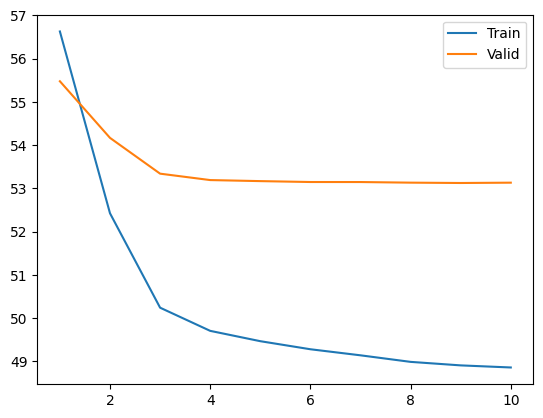

In [37]:
model = LSTMModel_3(hidden_layer_size=64, num_layers=2, dropout=0.5)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()
epochs = 10
train_loss, valid_loss = train_model(epochs, model, optimizer, criterion)

Epoch 0 losses 55.216076017459095 55.334642000287495
Epoch 1 losses 52.05331305015439 55.140984003417586
Epoch 2 losses 49.94218786894965 53.33918701896786
Epoch 3 losses 49.259838151146674 53.29045056256921
Epoch 4 losses 49.01738794382978 53.20992088614966
Epoch 5 losses 48.91476164664374 53.19835383572683
Epoch 6 losses 48.78098698560383 53.15160522282681
Epoch 7 losses 48.62350531804775 53.17524693985223
Epoch 8 losses 48.56264699820767 53.1725159850076
Epoch 9 losses 48.52024028708934 53.20599947837283


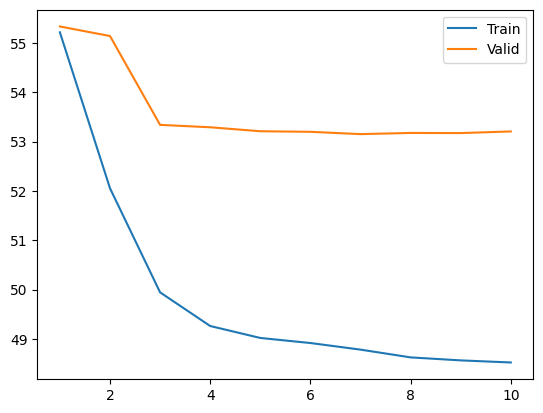

In [38]:
model = LSTMModel_3(hidden_layer_size=64, num_layers=3, dropout=0.4)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()
epochs = 10
train_loss, valid_loss = train_model(epochs, model, optimizer, criterion)

Epoch 0 losses 53.67922816622264 53.544071408447074
Epoch 1 losses 49.60115692775281 53.219685025675645
Epoch 2 losses 49.36982596781404 53.11509915824249
Epoch 3 losses 49.24069315370695 53.084601776622165
Epoch 4 losses 49.12314167599813 53.057274176695636
Epoch 5 losses 49.021961068569894 53.06578802839618
Epoch 6 losses 48.9282617928457 53.04278614365052
Epoch 7 losses 48.900536385937826 53.08159727173802
Epoch 8 losses 48.84845608076837 53.08274993718228
Epoch 9 losses 48.80755048986806 53.084906185898824


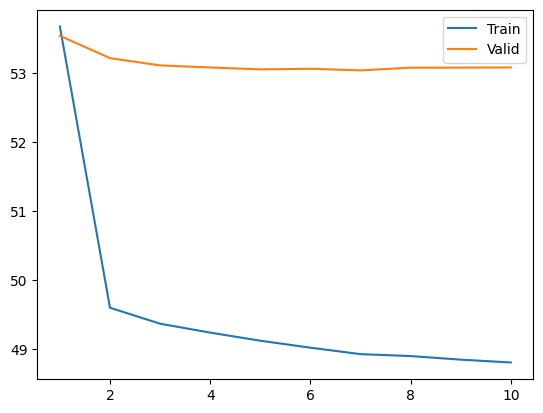

In [42]:
# Bringing back best performing model
model = LSTMModel(hidden_layer_size=32, num_layers=1, dropout=0.4)
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.MSELoss()
epochs = 10

train_loss, valid_loss = train_model(epochs, model, optimizer, criterion)

#### Generate predictions

In [87]:
model.eval()
predictions = []
true_labels = []
indices = []

with torch.no_grad():
    for data, labels, idx in test_loader:
        output = model(data)
        predictions.extend(output.numpy().flatten())
        true_labels.extend(labels.numpy().flatten())
        indices.extend(idx.numpy())

predictions_df = pd.DataFrame({
    'original_index': indices,
    'Projection': predictions
})

final_df = pd.merge(
    left=predictions_df,
    right=test_df,
    how='left',
    on='original_index'
)

final_df

predictions_df = final_df[['Name', 'game_date', 'position_3', 'position_4', 'position_5', 'position_6', 'position_7', 'dk_salary', 'Projection', 'dk_points']]
predictions_df = predictions_df.rename(columns={"position_3": "Position_3", "position_4": "Position_4", "position_5": "Position_5", "position_6": "Position_6", "position_7": "Position_7", "dk_salary": "Salary", "dk_points": "Points"})
predictions_df

,Name,game_date,Position_3,Position_4,Position_5,Position_6,Position_7,Salary,Projection,Points
0,AJ Pollock,2021-04-16,False,False,False,False,True,3200.0,5.683465,0.0
1,AJ Pollock,2021-04-17,False,False,False,False,True,3000.0,5.462676,0.0
2,AJ Pollock,2021-04-18,False,False,False,False,True,2800.0,4.461026,0.0
3,AJ Pollock,2021-04-19,False,False,False,False,True,3100.0,3.821422,0.0
4,AJ Pollock,2021-04-22,False,False,False,False,True,3200.0,4.570388,16.0
...,...,...,...,...,...,...,...,...,...,...
39904,Zack Short,2021-08-29,False,False,False,True,False,2900.0,4.187089,0.0
39905,Zack Short,2021-08-31,False,False,False,True,False,3100.0,4.366066,0.0
39906,Zack Short,2021-09-02,False,False,False,True,False,3000.0,3.713017,5.0
39907,Zack Short,2021-09-03,False,False,False,True,False,3400.0,3.518499,0.0


In [88]:
predictions_df.to_csv('hitter_predictions.csv', index=False)

In [89]:
import torch.nn.functional as F

mse_loss = F.mse_loss(torch.tensor(predictions), torch.tensor(true_labels))
rmse = torch.sqrt(mse_loss)
rmse

tensor(6.9276)

In [90]:
mean_array = [train_y.mean()] * len(test_y)
mse_loss = F.mse_loss(torch.tensor(mean_array), torch.tensor(true_labels))
old_rmse = torch.sqrt(mse_loss)

tensor(7.1021)

In [97]:
def calc_change(rmse):
    return (old_rmse - rmse) / old_rmse * 100

In [98]:
# LSTM
calc_change(6.9276)

2.457019754720436

In [99]:
# Linear model
calc_change(7.304)

-2.8428211374100645

In [100]:
# ME model
calc_change(7.324)

-3.124427986088618

In [101]:
# XGBoost
calc_change(7.317)

-3.025865589051127